In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from models.model_fpgan import FPGANSynthesizer
from models.model_ctgan import CTGANSynthesizer
from models.model_dpctgan import DPCTGANSynthesizer

import ctgan
from sklearn.model_selection import train_test_split
from utils.privacy import normalized_avg_dist
from utils.fidelity import get_predictions, eval_fidelity, get_accuracy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("D:/Datasets/heart_disease/heart_disease.csv")
#data = data.drop(columns=['id'])
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
#normalized_data=(data-data.mean())/data.std()
data=(data-data.min())/(data.max()-data.min())

In [5]:
data.shape
data = data[:70000]

In [6]:
target = 'HeartDiseaseorAttack'

In [7]:
X = data.drop(columns=[target])
y = data[target]

In [8]:
#model_ctgan = CTGANSynthesizer(epochs=20)
#model_ctgan = DPCTGANSynthesizer(verbose=True)
model_ctgan = FPGANSynthesizer(epochs=25,verbose=True)
#original_losses, tranformed_privacies, losses = model_ctgan.fit(data)
model_ctgan.fit(data)

Epoch 1, Loss G: -0.0903,Loss D: -1.5138
Epoch 2, Loss G: -0.3440,Loss D: -0.0491
Epoch 3, Loss G: -0.1848,Loss D: -0.4082
Epoch 4, Loss G: -0.0095,Loss D: -0.6959
Epoch 5, Loss G: -0.0206,Loss D: -0.6080
Epoch 6, Loss G: -0.0070,Loss D: -1.0523
Epoch 7, Loss G: -0.0389,Loss D: -0.6232
Epoch 8, Loss G:  0.0146,Loss D: -0.9625
Epoch 9, Loss G: -0.0242,Loss D: -0.7650
Epoch 10, Loss G: -0.0348,Loss D: -0.5892
Epoch 11, Loss G: -0.0352,Loss D: -0.1024
Epoch 12, Loss G: -0.0335,Loss D:  0.1001
Epoch 13, Loss G: -0.0110,Loss D: -0.3849
Epoch 14, Loss G: -0.0351,Loss D: -0.3267
Epoch 15, Loss G: -0.0616,Loss D: -0.4897
Epoch 16, Loss G: -0.2139,Loss D: -0.1222
Epoch 17, Loss G: -0.0943,Loss D: -0.2381
Epoch 18, Loss G: -0.1657,Loss D: -0.2411
Epoch 19, Loss G: -0.1155,Loss D:  0.3469
Epoch 20, Loss G: -0.1003,Loss D: -0.0442
Epoch 21, Loss G: -0.1375,Loss D: -0.4419
Epoch 22, Loss G: -0.0804,Loss D: -0.5146
Epoch 23, Loss G: -0.1313,Loss D: -0.4708
Epoch 24, Loss G: -0.1121,Loss D: -0.4298
E

([array(-0.01508558, dtype=float32),
  array(-0.01511573, dtype=float32),
  array(-0.01111329, dtype=float32),
  array(1.04305145e-05, dtype=float32),
  array(0.00348455, dtype=float32),
  array(0.0202412, dtype=float32),
  array(0.02897609, dtype=float32),
  array(0.0322338, dtype=float32),
  array(0.06267405, dtype=float32),
  array(0.05715134, dtype=float32),
  array(0.07069449, dtype=float32),
  array(0.07458203, dtype=float32),
  array(0.06467762, dtype=float32),
  array(0.06850561, dtype=float32),
  array(0.03765526, dtype=float32),
  array(-0.01507404, dtype=float32),
  array(-0.03432015, dtype=float32),
  array(-0.07470792, dtype=float32),
  array(-0.11291716, dtype=float32),
  array(-0.16200757, dtype=float32),
  array(-0.20091057, dtype=float32),
  array(-0.22690664, dtype=float32),
  array(-0.25446272, dtype=float32),
  array(-0.26221424, dtype=float32),
  array(-0.28074944, dtype=float32),
  array(-0.29043487, dtype=float32),
  array(-0.2372237, dtype=float32),
  array(-0.2

In [9]:
from utils.utils import save_models
save_models(model_ctgan, '025fpgan25', 'heart_disease')

In [10]:
from utils.utils import load_models
model_ctgan = load_models('025fpgan25', 'heart_disease')

In [11]:
samples = model_ctgan.sample(len(data))  # Synthetic copy
samples.dropna(how='any', inplace=True)

X_syn = samples.drop(columns=[target])
y_syn = samples[target]
y_syn = y_syn.round(0)
y_syn = y_syn.astype(int)

## Privacy

In [12]:
samples = samples.apply(pd.to_numeric) # convert all columns of DataFrame
data = data.apply(pd.to_numeric) # convert all columns of DataFrame
samples = samples[:2000]
data = data[:2000]

In [13]:
normalized_avg_distance = normalized_avg_dist(samples, data)
print(normalized_avg_distance)

[0.15127072]


## Fidelity

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(X_syn, y_syn, test_size=0.3, random_state=42, stratify=y_syn)

rr_pred = []
fr_pred = []
ff_pred = []
rf_pred = []

rr_pred = get_predictions(X_train, y_train, X_test, y_test)
fr_pred = get_predictions(X_syn_train, y_syn_train, X_test, y_test)

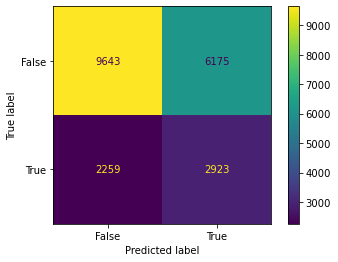

In [15]:
from sklearn import metrics
def print_confusion_matrix(rr_pred, fr_pred):
    confusion_matrix = metrics.confusion_matrix(rr_pred, fr_pred)

    cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display1.plot()
    plt.show()
    
print_confusion_matrix(rr_pred, fr_pred)

In [16]:
percentage = eval_fidelity(rr_pred, fr_pred)

In [17]:
rr_acc = get_accuracy(y_test, rr_pred)
fr_acc = get_accuracy(y_test, fr_pred)
print("Accuracy of real data: ", rr_acc)
print("Accuracy of synthetic data: ", fr_acc)

Accuracy of real data:  0.7886666666666666
Accuracy of synthetic data:  0.5715238095238095


In [18]:
from utils.fidelity import get_roc_auc
rr_score = get_roc_auc(y_test, rr_pred)
fr_score = get_roc_auc(y_test, fr_pred)
print("ROC AUC of real data: ", rr_score)
print("ROC AUC of synthetic data: ", fr_score)

ROC AUC of real data:  0.7459840146750525
ROC AUC of synthetic data:  0.5510711477987421


## Final plot

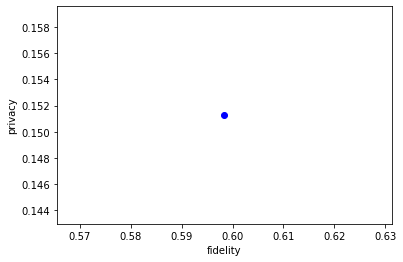

0.5983809523809523 [0.15127072]


In [19]:
plt.scatter(percentage, normalized_avg_distance, c ="blue")
plt.xlabel("fidelity")
plt.ylabel("privacy")
plt.show()
print(percentage, normalized_avg_distance)